In [ ]:
!unzip MNIST.zip_

In [3]:
import cv2 # pip install opencv-python # win10要编译很久的

im = cv2.imread("./MNIST/0_0_10.jpg")
print(im.shape)

(28, 28, 3)


name:  0_0_10.jpg
<class 'numpy.ndarray'>
(28, 28)


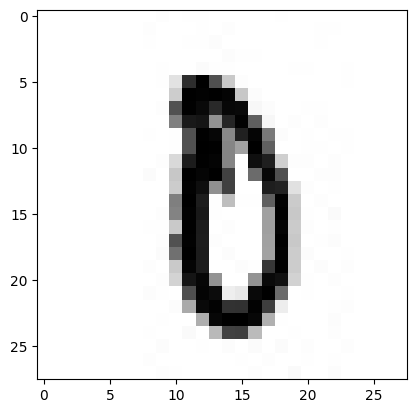

In [4]:
import os
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
import cv2
#import numpy as np

rootdir = './MNIST'
names = os.listdir(rootdir)

for name in names:
  print("name: ", name)
  path = os.path.join(rootdir, name)
  im = cv2.imread(path)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

  print(type(im))
  print(im.shape)

  cv2.imshow('image', im) # BUG: crash the colab kernel
  # cv2_imshow(im)
  plt.imshow(im.squeeze(), cmap='gray_r'); 
  
  break

In [7]:
"""
手写数字识别 pytorch 实现

reference:
    https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627
    doc\lang\programming\pytorch\李宏毅2020机器翻译\iAttention.py
    doc\lang\programming\pytorch\数字识别\ihandwritten_digit_recognition_GPU.ipynb
    https://gist.github.com/user01/68514db1127eb007f24d28bfd11dd60e


MNIST 图片的导出（）
# import cv2

# print( images.shape[0] )

# for j in range(30):
  
#   images, labels = next(dataiter)

#   for i in range(images.shape[0]):
#     a = ((images[i].numpy().squeeze() + 1) / 2) * 255  # 原来的数值范围是 -1.0 ~ +1.0 ，规范为 0 ~ 255
#     b = np.rint(a)  # Round elements of the array to the nearest integer.
#     #plt.imshow(b, cmap='gray_r')
#     #b
#     label = labels.numpy()[i]
#     #print(label)
#     #cv2.imshow('Binary Threshold', b)
#     cv2.imwrite(f'./out/{label}_{j}_{i}.jpg',b)

"""
import torch
from torch.types import Number
import torch.utils.data as torch_data
from torch import nn
from torch import optim

from time import time
import os
import cv2
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

def Data(type='training'):

    #currDir = os.getcwd() # jupyter is ok
    #currDir = os.path.dirname(os.path.abspath(__file__)) # jupyter not ok

    data = []


    currDir = "." # "/content" # jupyter not ok

    root = os.path.join(currDir, "MNIST")

    names = os.listdir(root)

    for name in names:

        #print("name: ", name)

        num = name.split('_')[0]  # number in fname already 
        num = int(num)

        #print( "label: ", num )

        #num = num / 10  # normalize number to 0.0 ~ 1.0

        path = os.path.join(root, name)
        im = cv2.imread(path)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

        """
        输入：im.shape，  可以看到维度是 (28, 28)
              im，       可以看到数值范围是 0 ~ 255
              im/255     可以看到数值范围变成了 0.0 ~ 1.0
        """
        # import pdb; pdb.set_trace() # 调试， exit 退出

        im = im / 255

        im_sq = im.reshape(28*28) # (28*28) 的图片降维成一维数组


        """
        输入：im_sq.shape 可以看到维度是 (784,)
        """

        #import pdb; pdb.set_trace()


        #print(im.shape)

        #print( type(im) )
        #print(im.shape)
        #print(im)

        # cv2.imshow('image', im) # BUG: crash the colab kernel
        #cv2_imshow(im)
        #plt.imshow(im.squeeze(), cmap='gray_r');

        data.append( [ torch.Tensor(im_sq), torch.Tensor([num]) ] )

        #break




    return data

class TorchDataset(torch_data.Dataset):
  def __init__(self, data):
    self.data = data
        
  def __len__(self):
    return len(self.data)
  def __getitem__(self, Index):
    item = self.data[Index]

    return item[0], item[1]

def infinite_iter(data_loader):
  it = iter(data_loader)
  while True:
    try:
      item_in , item_out = next(it)
      yield item_in, item_out
    except StopIteration:
      it = iter(data_loader)

#Data();


train_dataset = TorchDataset(Data(type='training'))
train_loader = torch_data.DataLoader(train_dataset, batch_size = 64, shuffle=True)  # 每个输入是维度是(2) 的一维数组，每一批总共输入2 组，维度既是：(2, 2)
train_iter = infinite_iter(train_loader)

sources, targets = next(train_iter)

print( sources, targets )






tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([[6.],
        [0.],
        [5.],
        [0.],
        [1.],
        [5.],
        [7.],
        [8.],
        [6.],
        [4.],
        [1.],
        [3.],
        [4.],
        [3.],
        [8.],
        [4.],
        [8.],
        [1.],
        [9.],
        [9.],
        [0.],
        [1.],
        [9.],
        [2.],
        [6.],
        [4.],
        [1.],
        [7.],
        [7.],
        [6.],
        [5.],
        [3.],
        [5.],
        [2.],
        [2.],
        [4.],
        [3.],
        [0.],
        [1.],
        [1.],
        [1.],
        [3.],
        [3.],
        [7.],
        [2.],
        [5.],
        [7.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
    

In [4]:
# 训练
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

import os
from google.colab import drive


from torchvision import datasets, transforms
from torch import nn
from torch import optim

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

criterion = nn.NLLLoss()


time0 = time()
epochs = 3
for e in range(epochs):

    for i in range(10000):

        running_loss = 0
    
        images, labels = next(train_iter)
    
        labels = labels.reshape(64)
        labels = torch.tensor(labels, dtype=torch.long) 
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(  images.cuda() if torch.cuda.is_available() else images.cpu() )

        #import pdb; pdb.set_trace() # 调试， exit 退出

        loss = criterion(output, labels.cuda() if torch.cuda.is_available() else labels.cpu())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()


    print("Epoch {} - Training loss: {}".format(e, running_loss/64))
    print("\nTraining Time (in minutes) =",(time()-time0)/60)




Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
cuda


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch 0 - Training loss: 0.00011264593922533095

Training Time (in minutes) = 0.25551716883977255
Epoch 1 - Training loss: 1.376107320538722e-05

Training Time (in minutes) = 0.5136989275614421
Epoch 2 - Training loss: 8.917024388210848e-06

Training Time (in minutes) = 0.769320539633433


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


3
3
Number Of Images Tested = 1

Model Accuracy = 1.0


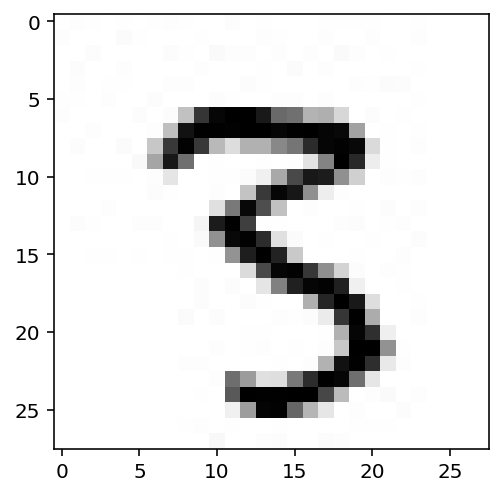

In [51]:
correct_count, all_count = 0, 0

images, labels = next(train_iter)
labels = labels.reshape(64)
labels = torch.tensor(labels, dtype=torch.long) 


with torch.no_grad():
  for i in range(1):
    img = images[i].reshape(1, 784)
    logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))


    img_to_show = images[i].reshape(28,28)
    img_to_show = img_to_show * 255

    plt.imshow(img_to_show, cmap='gray_r'); 

    print(pred_label)  # 预测的数字

    true_label = labels.numpy()[i]

    print(true_label)  # 真实的数字

    if(true_label == pred_label):
      correct_count += 1
    all_count += 1


print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))  # 预测的正确率

In [ ]:
# 准备数据
import torch
from google.colab import drive
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('./mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('./mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)



In [ ]:
# 观察数据
import matplotlib.pyplot as plt

dataiter = iter(trainloader)
images, labels = next(dataiter)  # images [64, 1, 28, 28]，64 张，1 通道，28 宽，28 高 的图片  # labels [64] 64个标签
  # 28*28 = 784 个像素点，每张图片作为输入是[768] 的一维数组，每一批总共输入64 张，既是：[64, 784]
  # so, 输入层共784 个神经元结点，每个结点得到图片的其中一个像素作为输入
print(type(images))
print(images.shape)
print(labels.shape)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');  # squeeze 将 [1, 28, 28] 降维成 [28, 28]


"""
输入： images[0].numpy().squeeze()
可以看到数值范围是：-1.0 ~ +1.0
"""
# import pdb; pdb.set_trace() # 调试， exit 退出


figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)  # 绘制  6 行，10 列 个对象
    plt.axis('off')            # 关闭坐标轴显示
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')



In [10]:
# 训练
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

import os
from google.colab import drive


from torchvision import datasets, transforms
from torch import nn
from torch import optim

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

criterion = nn.NLLLoss()


time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)  # 元素的总数不变，对维度重新进行解释，相当于 reshape  # 64 行，列数自适应(-1 的作用)  
          # 28*28 = 784 个像素点，每张图片作为输入是[784] 的一维数组，每一批总共输入64 张，既是：[64, 784]
    
        """
        输入： 
            images[0] 可以看到是张量 tensor，数值范围是：-1.0 ~ +1.0
            images[0].shape，可以看到维度是 784，是一维数组
            ((images[0]+1)/2)*255 ，数值范围规范为：0 ~ 255
        """
        #import pdb; pdb.set_trace() # 调试， exit 退出


        for i in range(len(images)):
          images[i] = ( (images[i]+1) / 2 ) # 原来的数值范围是 -1.0 ~ +1.0 ，规范为 0 ~ +1.0
        

        # Training pass
        optimizer.zero_grad()
        


        output = model(  images.cuda() if torch.cuda.is_available() else images.cpu() )
        loss = criterion(output, labels.cuda() if torch.cuda.is_available() else  labels.cpu())

        import pdb; pdb.set_trace() # 调试， exit 退出
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
cpu
> <ipython-input-10-32d940273697>(76)<module>()
-> loss.backward()
(Pdb) label.shape
*** NameError: name 'label' is not defined
(Pdb) labels.shape
torch.Size([64])
(Pdb) exit


BdbQuit: ignored

In [ ]:
# 验证模型精度
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    img = ( (img+1) / 2 ) # 原来的数值范围是 -1.0 ~ +1.0 ，规范为 0 ~ +1.0
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

In [ ]:
# 预测
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

images, labels = next(iter(valloader))

img = images[0].view(1, 784)
img = ( (img+1) / 2 ) # 原来的数值范围是 -1.0 ~ +1.0 ，规范为 0 ~ +1.0

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)